#### EXERCÍCIO 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


np.random.seed(42) # define the seed (important to reproduce the results)

data = pd.read_csv('data/vertebralcolumn-3C.csv', header=(0))
data = data.dropna(axis='rows') #remove NaN
data = data.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

p = 0.2 # fraction of elements in the test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)

In [2]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

model = SVC(C = 10, gamma = 'auto')
model.fit(x_train,y_train)
y_pred = model.predict(x_test) 
score = accuracy_score(y_pred, y_test)
precision = precision_score(y_test, y_pred, average="macro")
print('SCORE: ', round(score, 1), '\nPRECISION: ', round(precision, 1))

SCORE:  0.8 
PRECISION:  0.8


#### EXERCÍCIO 2

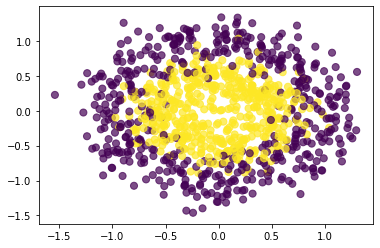

In [3]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np 

np.random.seed(42) # define the seed (important to reproduce the results)

plt.figure(figsize=(6,4))

n_samples = 1000
data  = noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.2, random_state = 42)
X = data[0]
y = data[1]
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', s=50, alpha=0.7)
plt.show(True)

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

p = 0.2 # fraction of elements in the test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)

In [4]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import precision_score

models = [
        ('RandomForest | n=100', RandomForestClassifier(n_estimators=100, bootstrap=True, class_weight=None,                  criterion='gini',
                max_depth=None, max_features='auto', max_leaf_nodes=None,
                min_impurity_decrease=0.0, min_impurity_split=None,
                min_samples_leaf=1, min_samples_split=2,
                min_weight_fraction_leaf=0.0, n_jobs=1,
                oob_score=False, random_state=None, verbose=0,
                warm_start=False)),
    ('Entropy', tree.DecisionTreeClassifier(criterion = 'entropy',random_state = 101)),
    ('Gaussian NB', GaussianNB()),
    ('Adabosting | n=10', SVC(C = 10, gamma = 'auto'))
    
]


for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    print('Precision Score ({}): \t{}'.format(name, round(precision_score(y_test, y_pred, average="macro"), 1)))

Precision Score (RandomForest | n=100): 	0.8
Precision Score (Entropy): 	0.8
Precision Score (Gaussian NB): 	0.8
Precision Score (Adabosting | n=10): 	0.8


#### EXERCÍCIO 3

In [5]:
import random
random.seed(42) # define the seed (important to reproduce the results)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('data/iris.csv', header=(0))

# remove NaN
data = data.dropna(axis='rows') #
# armazena o nome das classes
classes = np.array(pd.unique(data[data.columns[-1]]), dtype=str)  #name of the clases
features_names = data.columns

data = data.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

from sklearn.model_selection import train_test_split
p = 0.2 # fracao de elementos no conjunto de teste
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)

Number of Estimators: 1 Accuracy: 0.9666666666666667
Number of Estimators: 11 Accuracy: 1.0
Number of Estimators: 21 Accuracy: 1.0
Number of Estimators: 31 Accuracy: 1.0
Number of Estimators: 41 Accuracy: 1.0
Number of Estimators: 51 Accuracy: 1.0
Number of Estimators: 61 Accuracy: 1.0
Number of Estimators: 71 Accuracy: 1.0
Number of Estimators: 81 Accuracy: 1.0
Number of Estimators: 91 Accuracy: 1.0
Melhor n: 11  com acurácia: 1.0


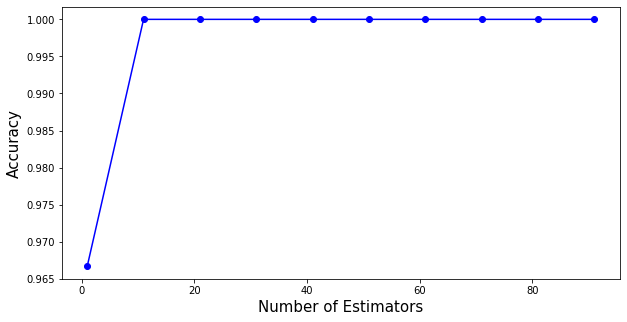

In [6]:
vscore = []
vn = []
for n in range(1,100,10):
    model = RandomForestClassifier(n_estimators=n)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test) 
    score = accuracy_score(y_pred, y_test)
    print('Number of Estimators:', n, 'Accuracy:', score)
    vscore.append(score)
    vn.append(n)
best_n = vn[np.argmax(vscore)]
print('Melhor n:', best_n, ' com acurácia:', vscore[np.argmax(vscore)] )
plt.figure(figsize=(10,5))
plt.plot(vn, vscore, '-bo')
plt.xlabel('Number of Estimators', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.show()

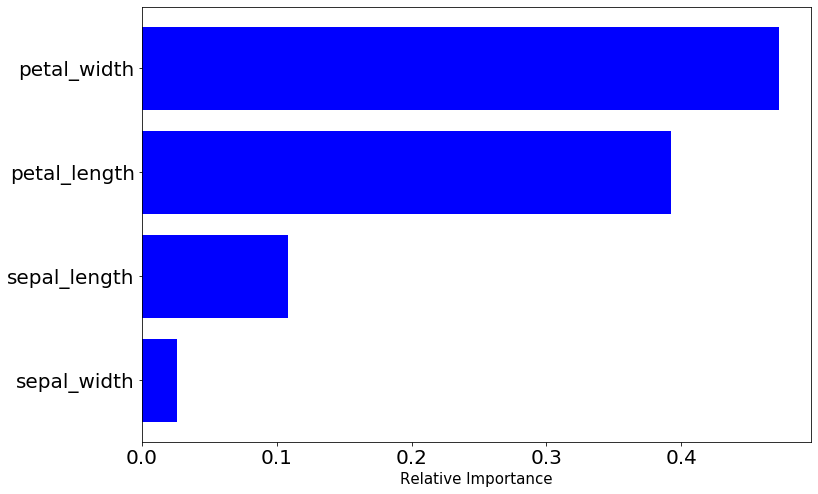

In [7]:
importances = model.feature_importances_
indices = np.argsort(importances)
lmeas_order = []
for i in indices:
    lmeas_order.append(features_names[i])
plt.figure(figsize=(12,8))
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), lmeas_order, fontsize=15)
plt.xlabel('Relative Importance',fontsize=15)
plt.xticks(color='k', size=20)
plt.yticks(color='k', size=20)
plt.show()

#### EXERCÍCIO 4

In [8]:
import random
random.seed(42) # define the seed (important to reproduce the results)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('data/Vehicle.csv', header=(0))

# remove NaN
data = data.dropna(axis='rows') #
# armazena o nome das classes
classes = np.array(pd.unique(data[data.columns[-1]]), dtype=str)  #name of the clases
features_names = data.columns

data = data.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

from sklearn.model_selection import train_test_split
p = 0.2 # fracao de elementos no conjunto de teste
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)

Number of Estimators: 1 Accuracy: 0.7352941176470589
Number of Estimators: 11 Accuracy: 0.788235294117647
Number of Estimators: 21 Accuracy: 0.7705882352941177
Number of Estimators: 31 Accuracy: 0.7705882352941177
Number of Estimators: 41 Accuracy: 0.7647058823529411
Number of Estimators: 51 Accuracy: 0.7588235294117647
Number of Estimators: 61 Accuracy: 0.7529411764705882
Number of Estimators: 71 Accuracy: 0.7470588235294118
Number of Estimators: 81 Accuracy: 0.7470588235294118
Number of Estimators: 91 Accuracy: 0.7705882352941177
Melhor n: 11  com acurácia: 0.788235294117647


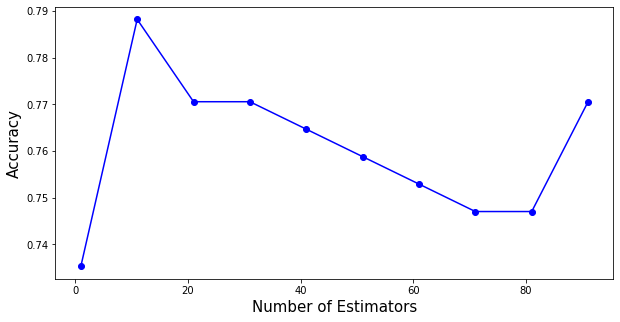

In [9]:
vscore = []
vn = []
for n in range(1,100,10):
    model = RandomForestClassifier(n_estimators=n)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test) 
    score = accuracy_score(y_pred, y_test)
    print('Number of Estimators:', n, 'Accuracy:', score)
    vscore.append(score)
    vn.append(n)
best_n = vn[np.argmax(vscore)]
print('Melhor n:', best_n, ' com acurácia:', vscore[np.argmax(vscore)] )
plt.figure(figsize=(10,5))
plt.plot(vn, vscore, '-bo')
plt.xlabel('Number of Estimators', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.show()

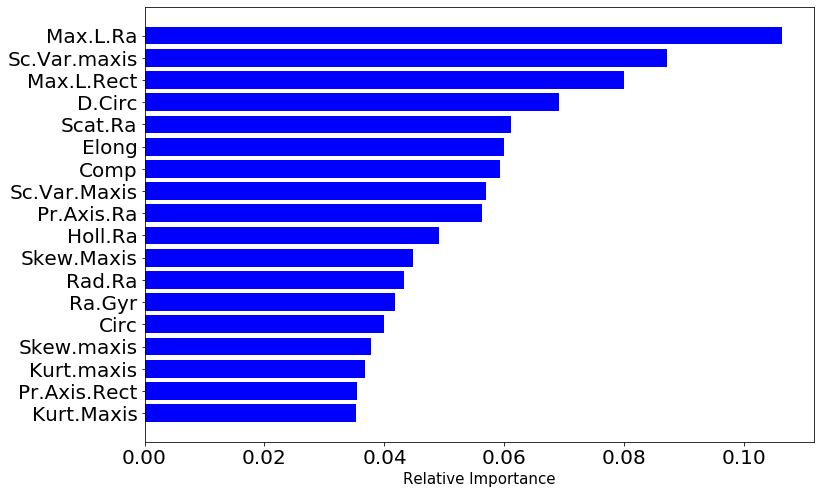

In [10]:
importances = model.feature_importances_
indices = np.argsort(importances)
lmeas_order = []
for i in indices:
    lmeas_order.append(features_names[i])
plt.figure(figsize=(12,8))
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), lmeas_order, fontsize=15)
plt.xlabel('Relative Importance',fontsize=15)
plt.xticks(color='k', size=20)
plt.yticks(color='k', size=20)
plt.show()

#### EXERCÍCIO 5

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

np.random.seed(42) # define the seed (important to reproduce the results)

data = pd.read_csv('data/BreastCancer.csv', header=(0))
data = data.dropna(axis='rows') #remove NaN
data = data.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

p = 0.2 # fraction of elements in the test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)

In [12]:
from sklearn.metrics import roc_auc_score

model = SVC(C = 10, gamma = 'auto')
model.fit(x_train,y_train)
y_pred = model.predict(x_test) 
score = accuracy_score(y_pred, y_test)
precision = precision_score(y_test, y_pred, average="macro")
roc_curve = roc_auc_score(y_test, y_pred)
print('SCORE: ', round(score, 1), '\nPRECISION: ', round(precision, 1), '\nROC: ', round(roc_curve, 1))

SCORE:  1.0 
PRECISION:  1.0 
ROC:  1.0
